## Libraries

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE


## Understanding the Dataset

### Loading the Dataset

In [138]:
data = pd.read_csv('../Data/dataset_churn.csv')

data.head()

,Unnamed: 0,CustomerID,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,0,08729464-bde6-43bc-8f63-a357096feab1,56.0,Male,13,DSL,Yes,No,One year,Mailed check,71.88,931.49,No,No,Yes,No,No
1,1,af95bc95-baf4-4318-a21d-70d2ea3148b7,69.0,Male,13,DSL,No,Yes,Two year,Mailed check,110.99,1448.46,Yes,Yes,No,No,No
2,2,1fe7eee6-2227-4400-9998-4d993f4a60fd,46.0,Male,60,Fiber optic,No,Yes,Month-to-month,Mailed check,116.74,6997.73,Yes,Yes,No,No,No
3,3,f736fe7b-1b44-4acd-84c2-21c4aef648be,32.0,Female,57,Fiber optic,Yes,Yes,Month-to-month,Bank transfer,78.16,4452.13,No,Yes,No,Yes,No
4,4,4b40d12d-7633-4309-96b8-aee675ea20ae,60.0,Male,52,Fiber optic,Yes,Yes,Two year,Electronic check,30.33,1569.73,Yes,No,Yes,Yes,No


In [139]:
# removing the index column from the dataset.
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('CustomerID', axis=1)

### Understanding the Dataset.

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               3562 non-null   float64
 1   Gender            3749 non-null   object 
 2   Tenure            3749 non-null   int64  
 3   Service_Internet  3028 non-null   object 
 4   Service_Phone     3749 non-null   object 
 5   Service_TV        3749 non-null   object 
 6   Contract          3749 non-null   object 
 7   PaymentMethod     3562 non-null   object 
 8   MonthlyCharges    3749 non-null   float64
 9   TotalCharges      3749 non-null   float64
 10  StreamingMovies   3749 non-null   object 
 11  StreamingMusic    3749 non-null   object 
 12  OnlineSecurity    3749 non-null   object 
 13  TechSupport       3749 non-null   object 
 14  Churn             3749 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 439.5+ KB


In [141]:
# Describe each feature
for column in data.columns:
    print(f"Feature: {column}")
    print(data[column].value_counts() if data[column].dtype == 'object' else data[column].describe())
    print("\n")


Feature: Age
count    3562.000000
mean       43.655531
std        14.914474
min        18.000000
25%        31.000000
50%        44.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64


Feature: Gender
Gender
Male      1895
Female    1854
Name: count, dtype: int64


Feature: Tenure
count    3749.000000
mean       36.264070
std        20.505528
min         1.000000
25%        19.000000
50%        36.000000
75%        54.000000
max        71.000000
Name: Tenure, dtype: float64


Feature: Service_Internet
Service_Internet
Fiber optic    1908
DSL            1120
Name: count, dtype: int64


Feature: Service_Phone
Service_Phone
Yes    2621
No     1128
Name: count, dtype: int64


Feature: Service_TV
Service_TV
Yes    2188
No     1561
Name: count, dtype: int64


Feature: Contract
Contract
Month-to-month    2183
Two year           792
One year           774
Name: count, dtype: int64


Feature: PaymentMethod
PaymentMethod
Electronic check    1400
Bank transfer        742
M

In [142]:
data.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,3562.000000,3749.000000,3749.000000,3749.000000
mean,43.655531,36.264070,75.844318,2718.968266
std,14.914474,20.505528,73.062971,3211.879149
min,18.000000,1.000000,20.000000,13.190000
25%,31.000000,19.000000,44.570000,1076.240000
50%,44.000000,36.000000,69.590000,2132.260000
75%,56.000000,54.000000,95.540000,3619.710000
max,69.000000,71.000000,1179.300000,79951.800000


# Data Preprocessing.

In [143]:
# Checking for missing values
data.isnull().sum()

Age                 187
Gender                0
Tenure                0
Service_Internet    721
Service_Phone         0
Service_TV            0
Contract              0
PaymentMethod       187
MonthlyCharges        0
TotalCharges          0
StreamingMovies       0
StreamingMusic        0
OnlineSecurity        0
TechSupport           0
Churn                 0
dtype: int64

In [144]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]
missing_values


Age                 187
Service_Internet    721
PaymentMethod       187
dtype: int64

### Handling missing values of Numerical Feature 

In [145]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data['Age'] = imputer.fit_transform(data['Age'].values.reshape(-1, 1))

data['Age'].isna().sum()

0

### Handling missing values of Categorical Feature 

In [146]:
for column in ['Service_Internet', 'PaymentMethod']:
    data[column] = data[column].fillna(random.choice(data[column].dropna().unique()))


In [147]:
print(data['Service_Internet'].isna().sum(), data['PaymentMethod'].isna().sum())

0 0


## LBELING THE CATEGORICAL FEATURES

In [148]:
# One-hot encoding for nominal categorical features
cat_features = ['Gender', 'Service_Internet', 'Service_Phone', 'Service_TV', 'Contract', 'PaymentMethod', 'StreamingMovies', 'StreamingMusic', 'OnlineSecurity', 'TechSupport', 'Churn']

# Label encoding for binary categorical feature
label_encoder = LabelEncoder()
for feature in cat_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Display the first few rows of the encoded dataset
data.head()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,56.0,1,13,0,1,0,1,3,71.88,931.49,0,0,1,0,0
1,69.0,1,13,0,0,1,2,3,110.99,1448.46,1,1,0,0,0
2,46.0,1,60,1,0,1,0,3,116.74,6997.73,1,1,0,0,0
3,32.0,0,57,1,1,1,0,0,78.16,4452.13,0,1,0,1,0
4,60.0,1,52,1,1,1,2,2,30.33,1569.73,1,0,1,1,0


## OUTLIER

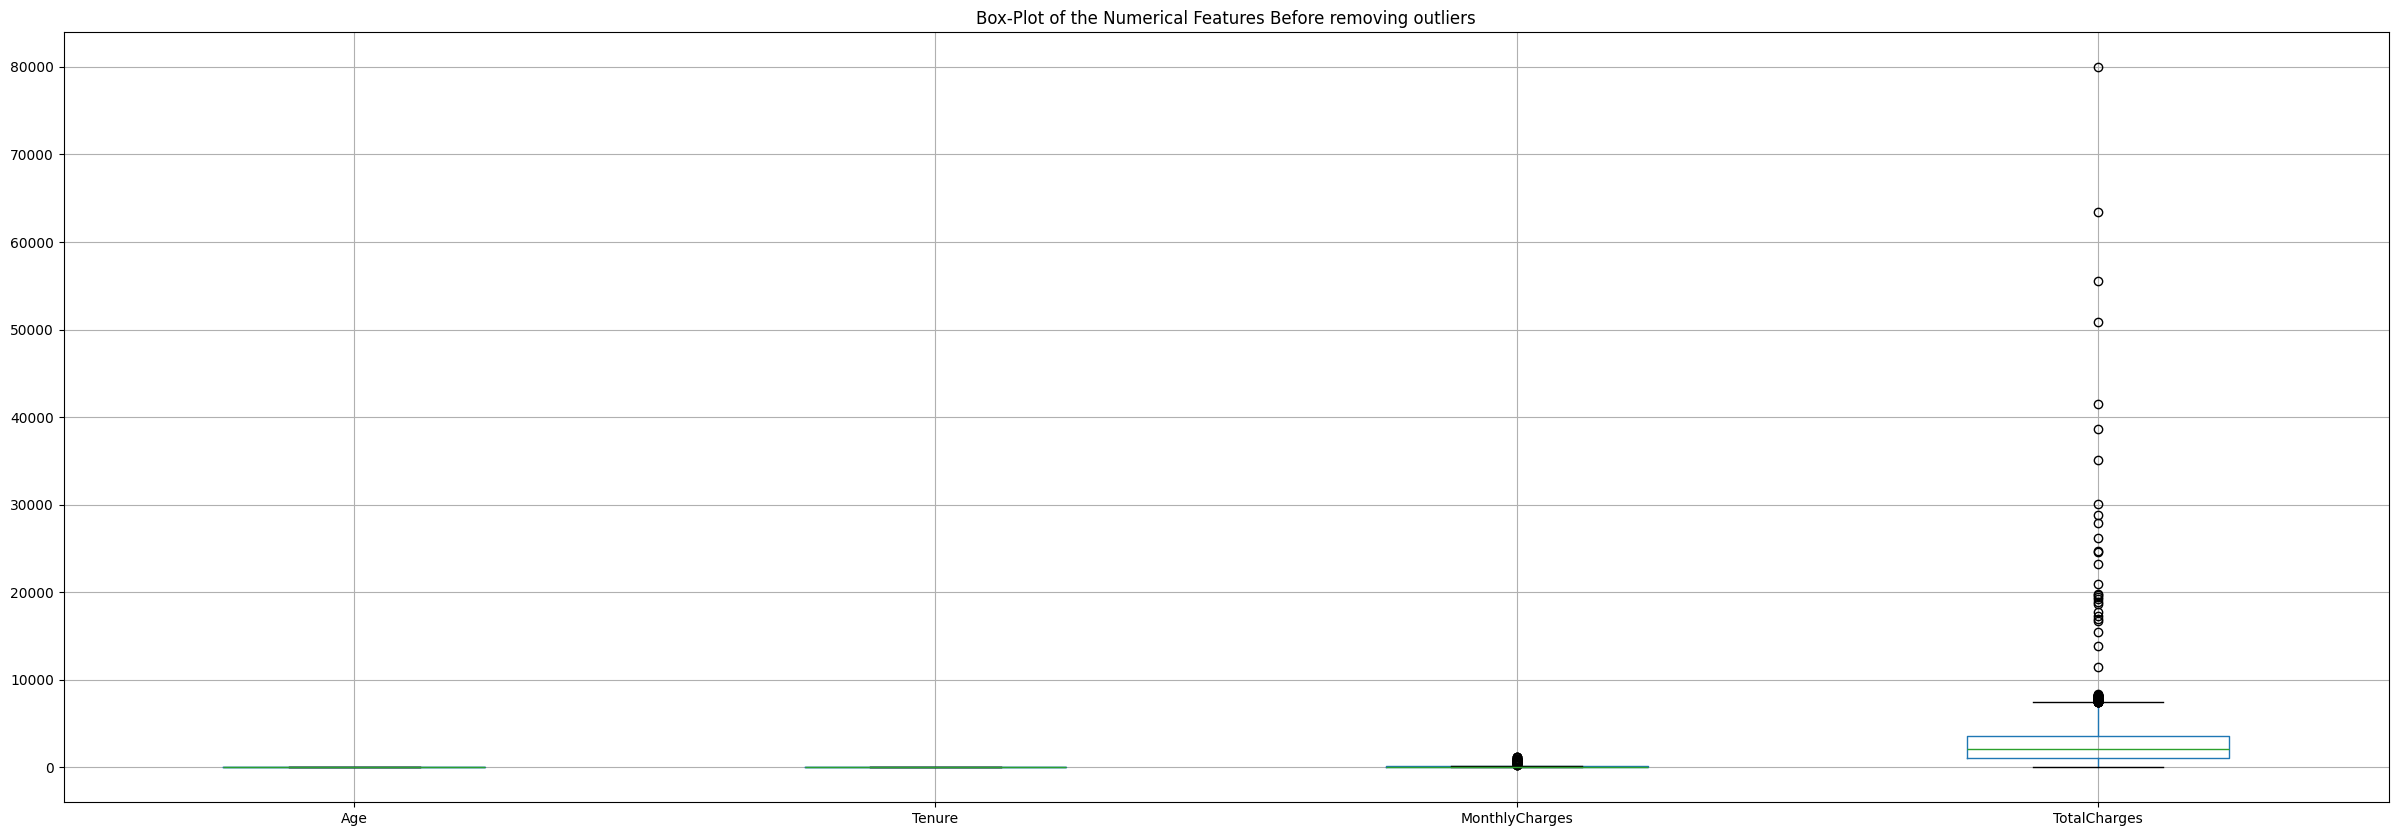

In [149]:
numerical_features = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

# plot box-plot before detecting outliers
plt.figure(figsize=(30, 10))
plt.title('Box-Plot of the Numerical Features Before removing outliers')
data[numerical_features].boxplot(grid=True)
plt.show()

In [150]:

def iqr_outliers(dataset,feature_name, multiplier=2):
    
    Q1 = dataset[feature_name].quantile(0.25)
    Q3 = dataset[feature_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lwr_bound = Q1 - multiplier * IQR
    upp_bound = Q3 + multiplier * IQR 
    
    ls = dataset.index[np.logical_or(dataset[feature_name]<lwr_bound, 
                                dataset[feature_name]>upp_bound)] 
    return ls #return the indexes

outliers_detected={}
for i in numerical_features:
    outliers = iqr_outliers(data,i)
    outliers_detected[i] = outliers
    
    print('Variable',i)
    print(outliers)
    print(data[i].iloc[outliers])
    print('\n')

Variable Age
Index([], dtype='int64')
Series([], Name: Age, dtype: float64)


Variable Tenure
Index([], dtype='int64')
Series([], Name: Tenure, dtype: int64)


Variable MonthlyCharges
Index([  34,  106,  217,  253,  379,  590,  639,  667,  733,  787,  791,  938,
        944, 1043, 1151, 1258, 1261, 1343, 1619, 1904, 1952, 1982, 2356, 2495,
       2497, 2509, 2590, 2601, 2736, 2851, 2977, 3085, 3137, 3210, 3246, 3459,
       3514],
      dtype='int64')
34       492.8
106      773.8
217      255.1
253      862.2
379      929.8
590      933.3
639      491.0
667      329.8
733      597.3
787      544.1
791      959.9
938     1119.1
944      995.1
1043     875.0
1151     567.1
1258    1146.0
1261     967.4
1343     436.7
1619    1179.3
1904     607.3
1952     855.1
1982     278.7
2356     431.1
2495    1146.6
2497     755.7
2509     663.2
2590     548.8
2601     937.5
2736     597.2
2851     746.8
2977     518.8
3085     235.9
3137     632.2
3210     533.5
3246     856.3
3459     285.2
3514

In [151]:
for i in numerical_features:
    data[i] = data[i].replace(data[i].iloc[outliers_detected[i]].values,data[i].median())

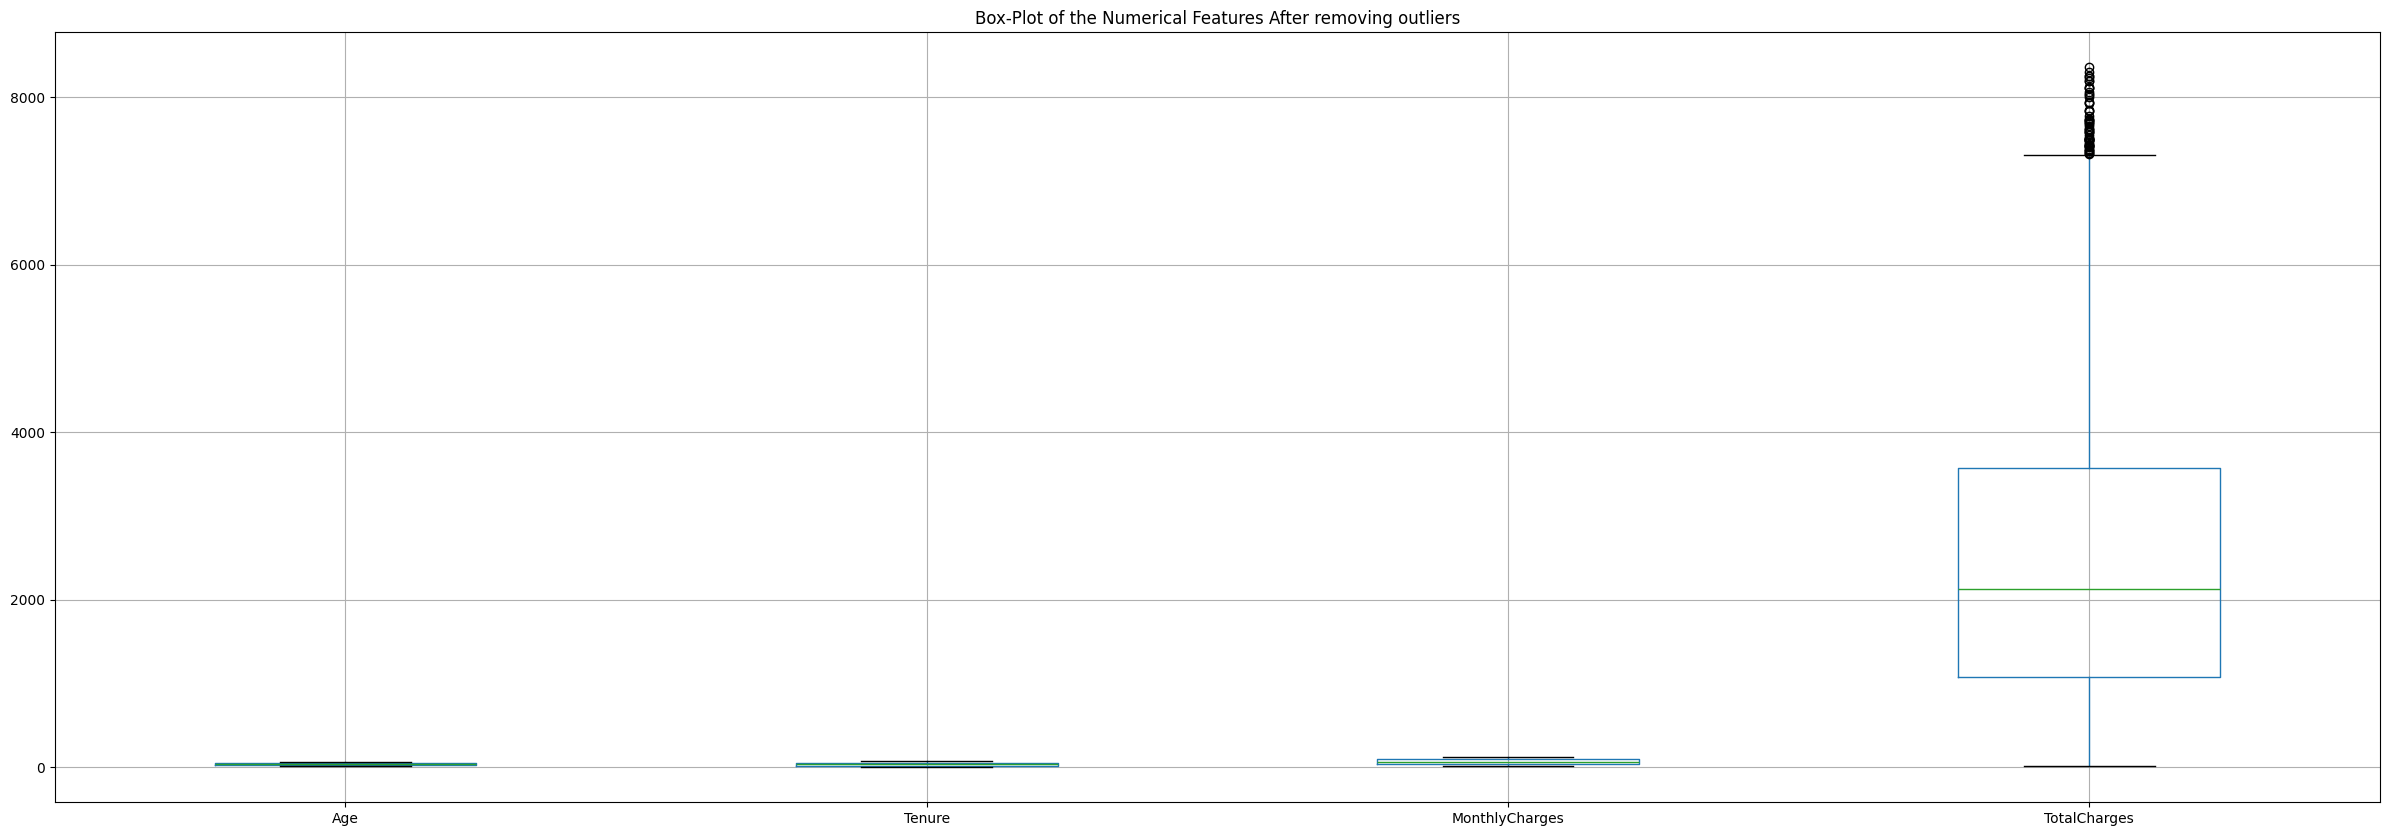

In [152]:
plt.figure(figsize=(30, 10))
plt.title('Box-Plot of the Numerical Features After removing outliers')
data[numerical_features].boxplot(grid=True)
plt.show()

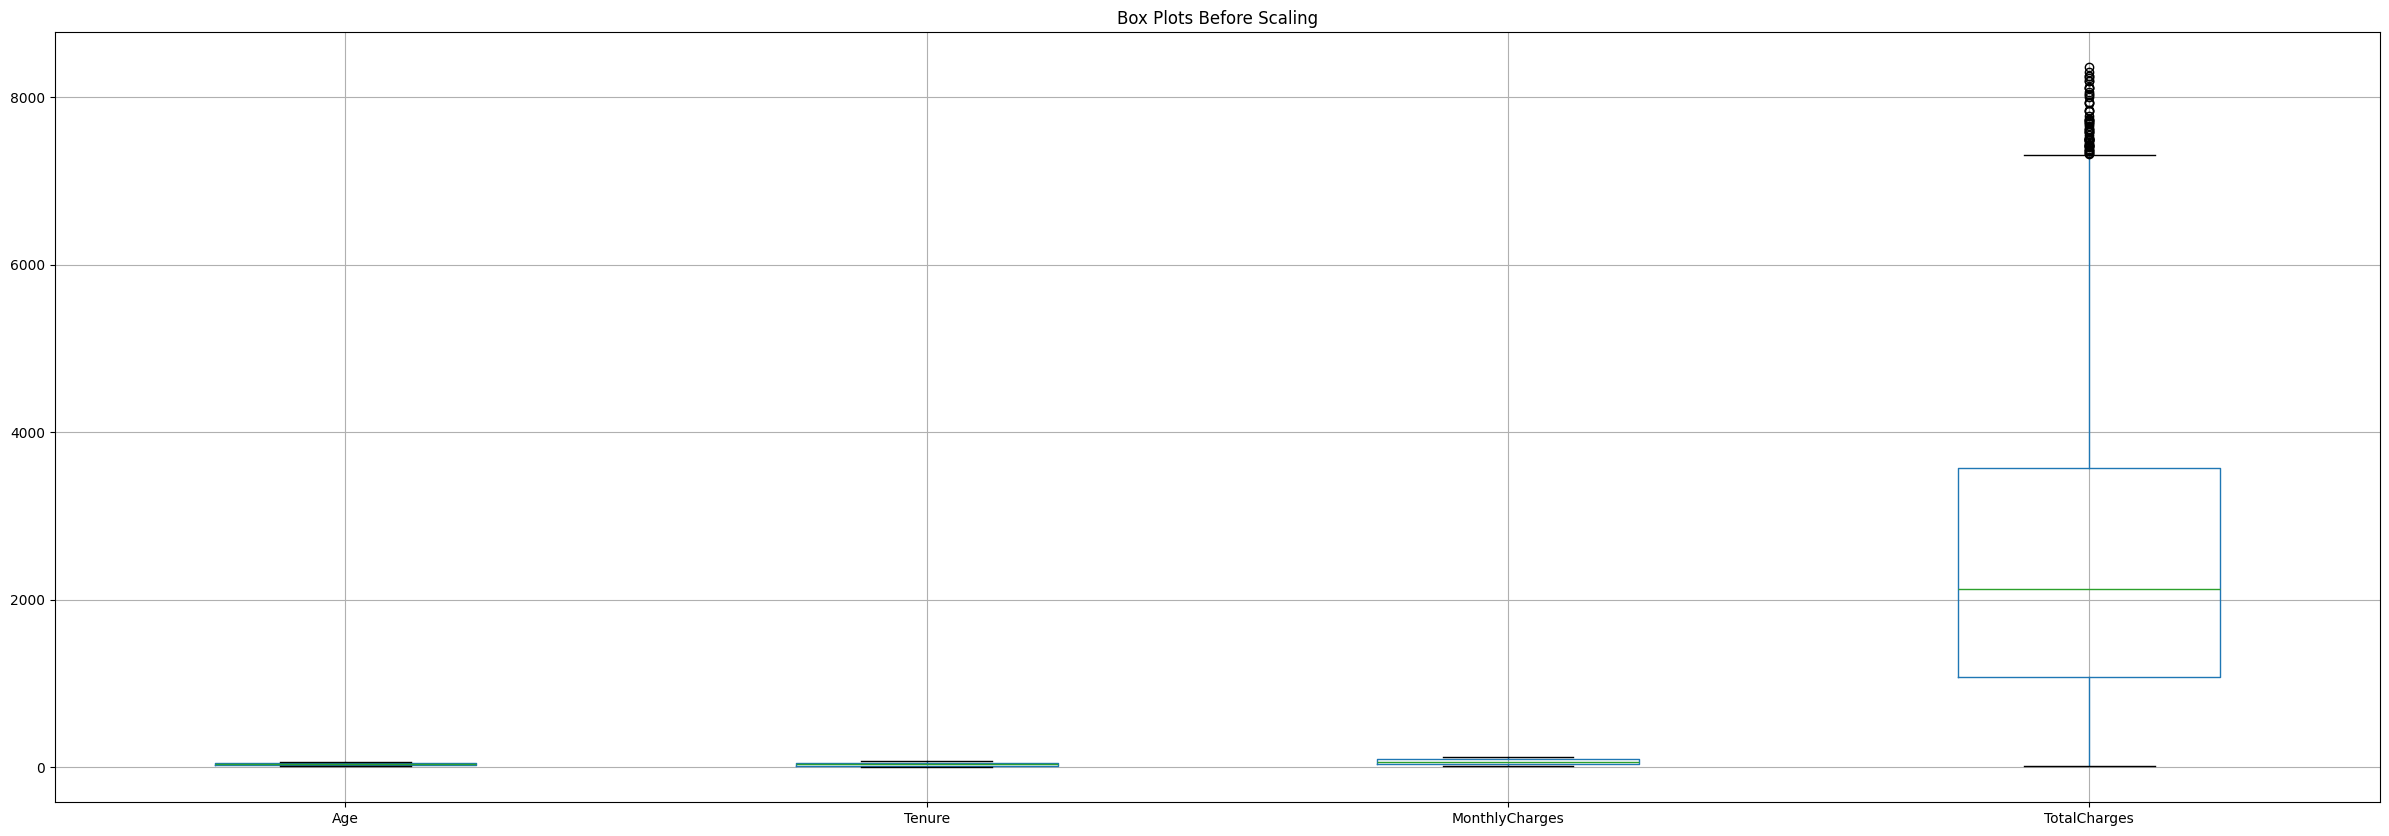

In [153]:
plt.figure(figsize=(30,10))
plt.title(f'Box Plots Before Scaling')
data[numerical_features].boxplot(grid=True)
plt.show()

In [154]:
data.to_csv('/Users/sahilnakrani/Documents/DATA_ANALYSIS/ML/MachineLearning/Data/cleaned_data.csv')

In [155]:
scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[numerical_features] = scaler.fit_transform(data_scaled[numerical_features])

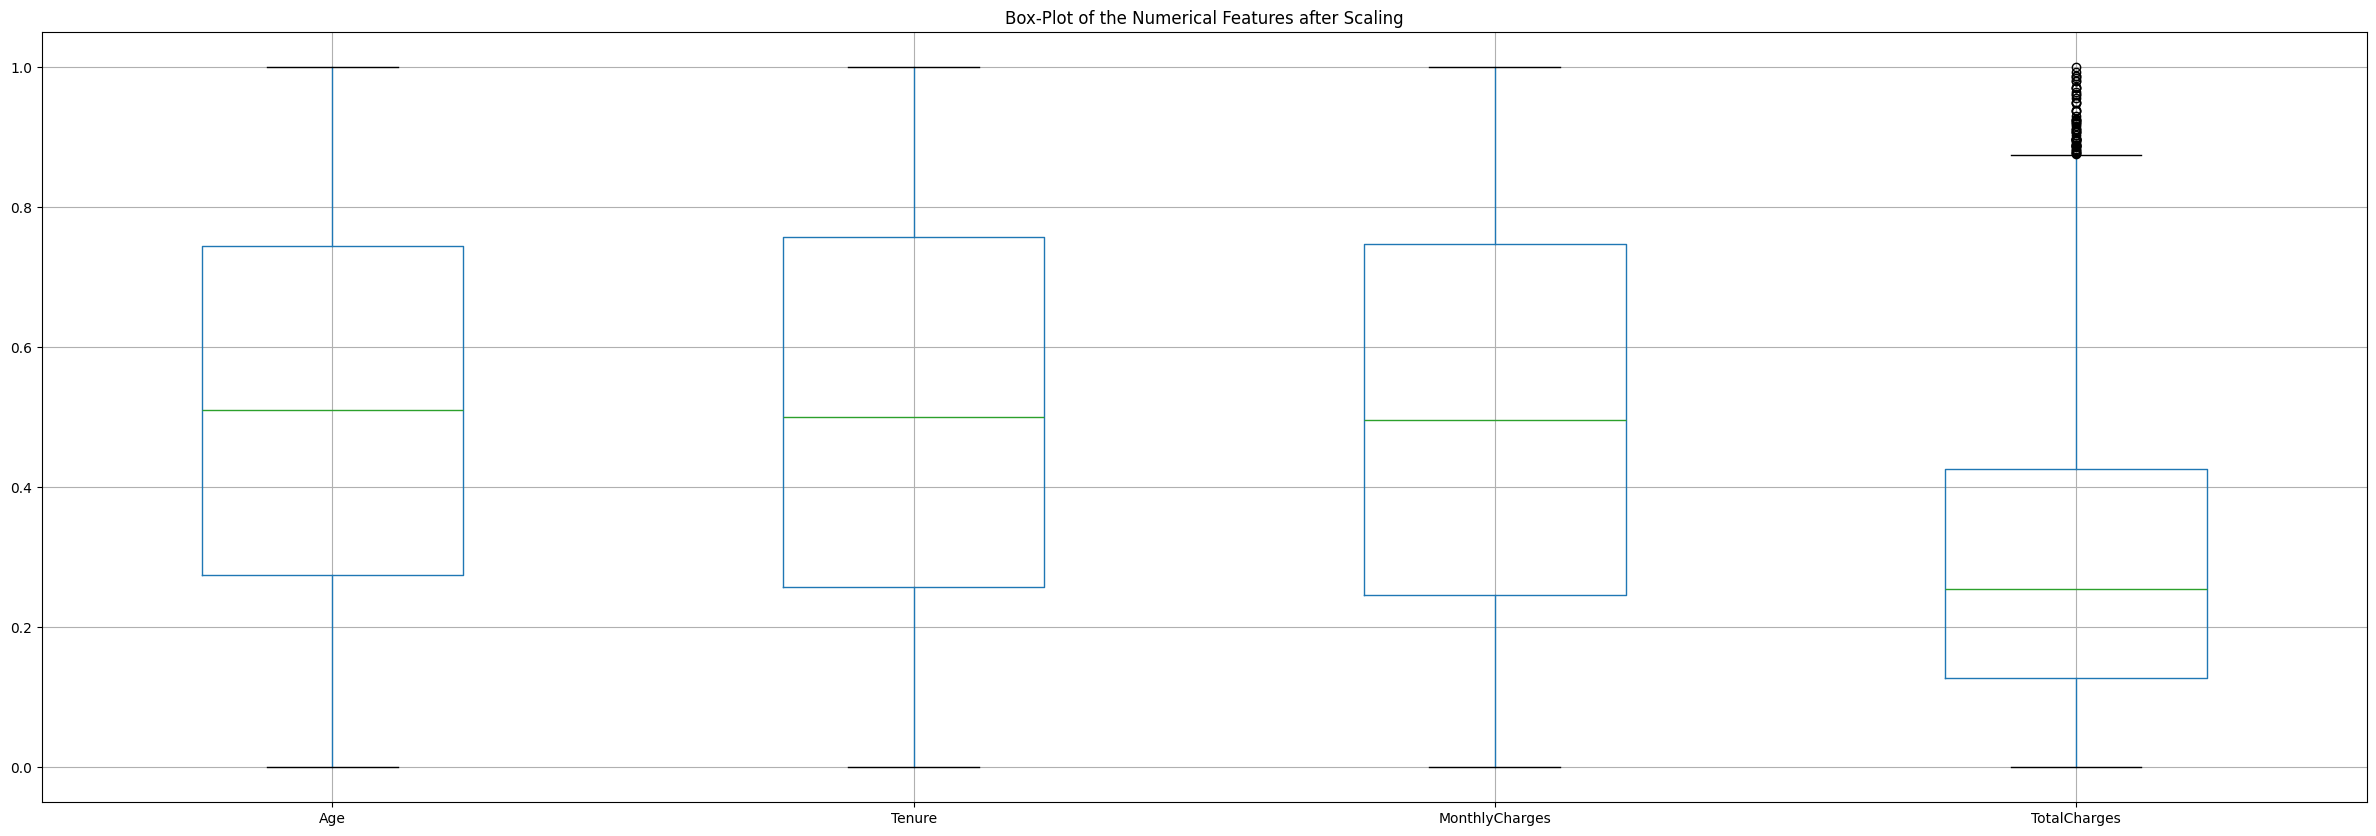

In [156]:
plt.figure(figsize=(30, 10))
plt.title('Box-Plot of the Numerical Features after Scaling')
data_scaled[numerical_features].boxplot(grid=True)
plt.show()

# EDA ( Exploratory Data Analysis )

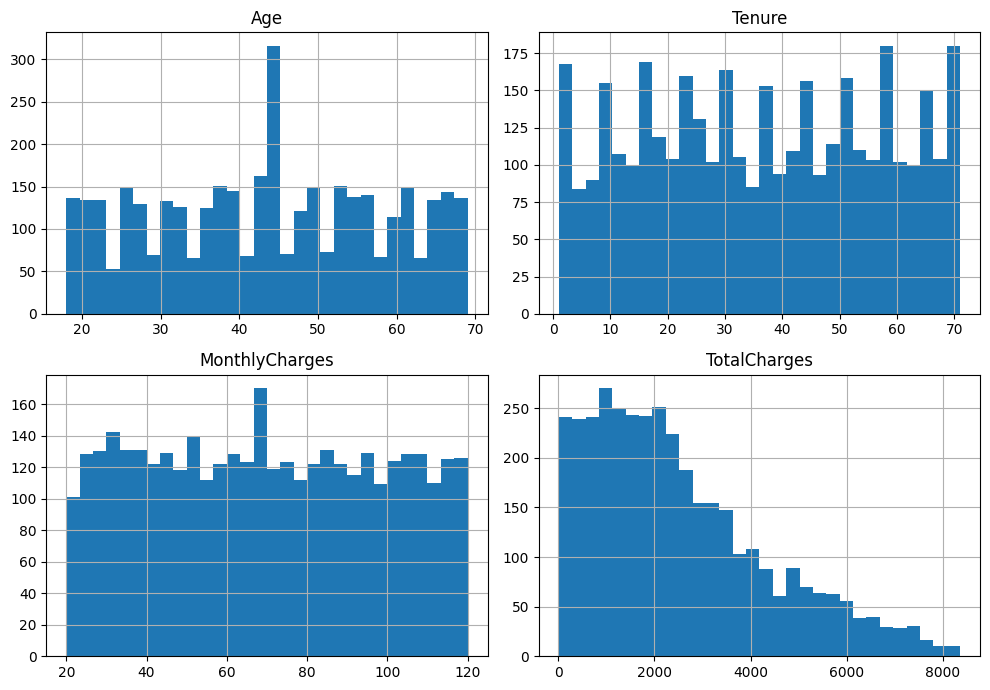

In [157]:
data[numerical_features].hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.show()

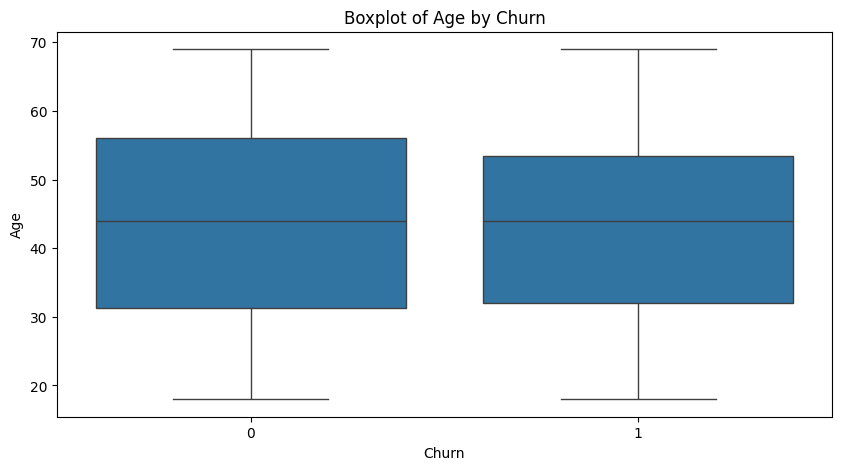

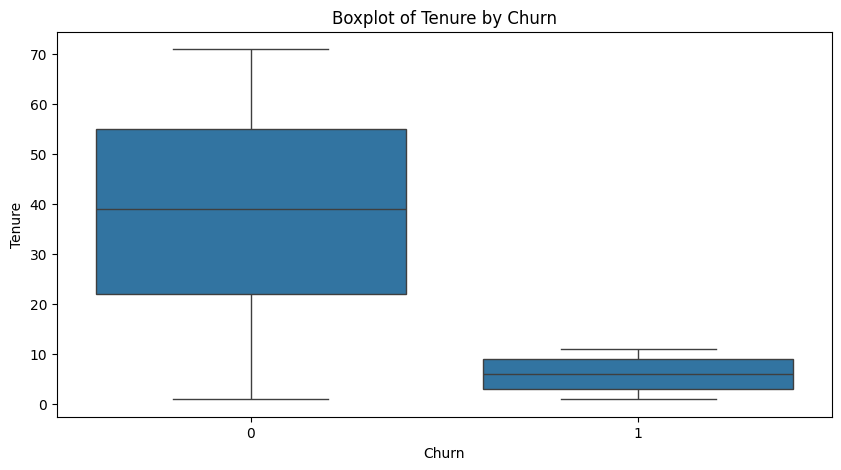

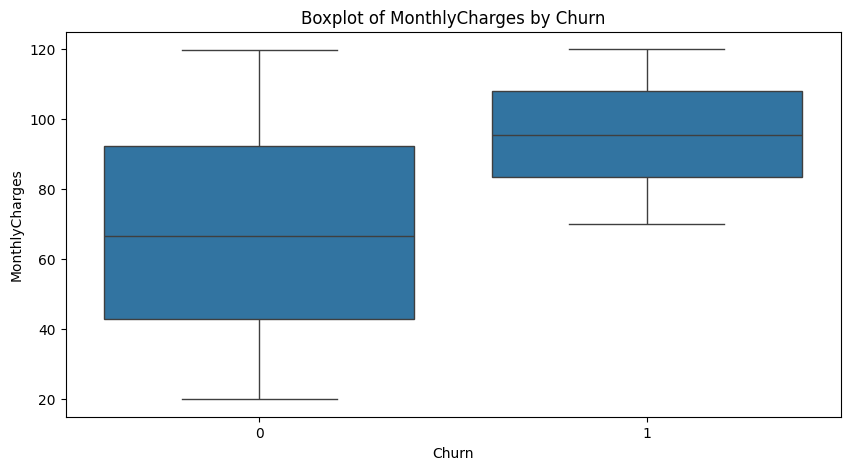

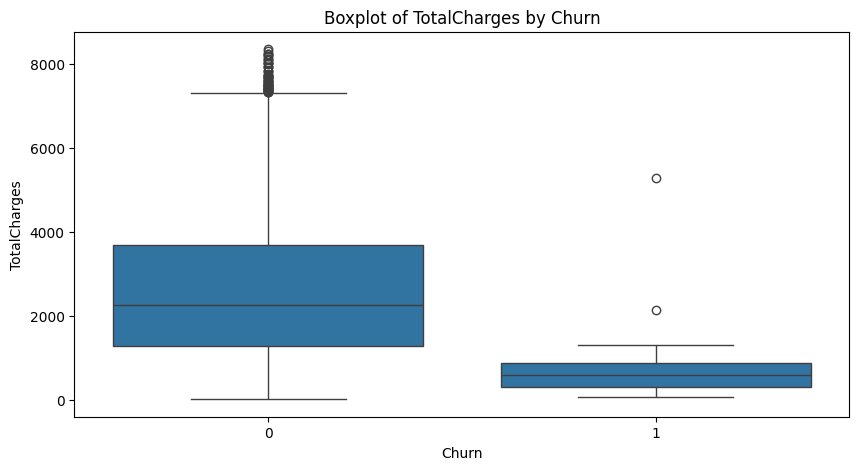

In [158]:
# Investigate relationships between features and the target variable
for column in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Churn', y=column, data=data)
    plt.title(f'Boxplot of {column} by Churn')
    plt.show()

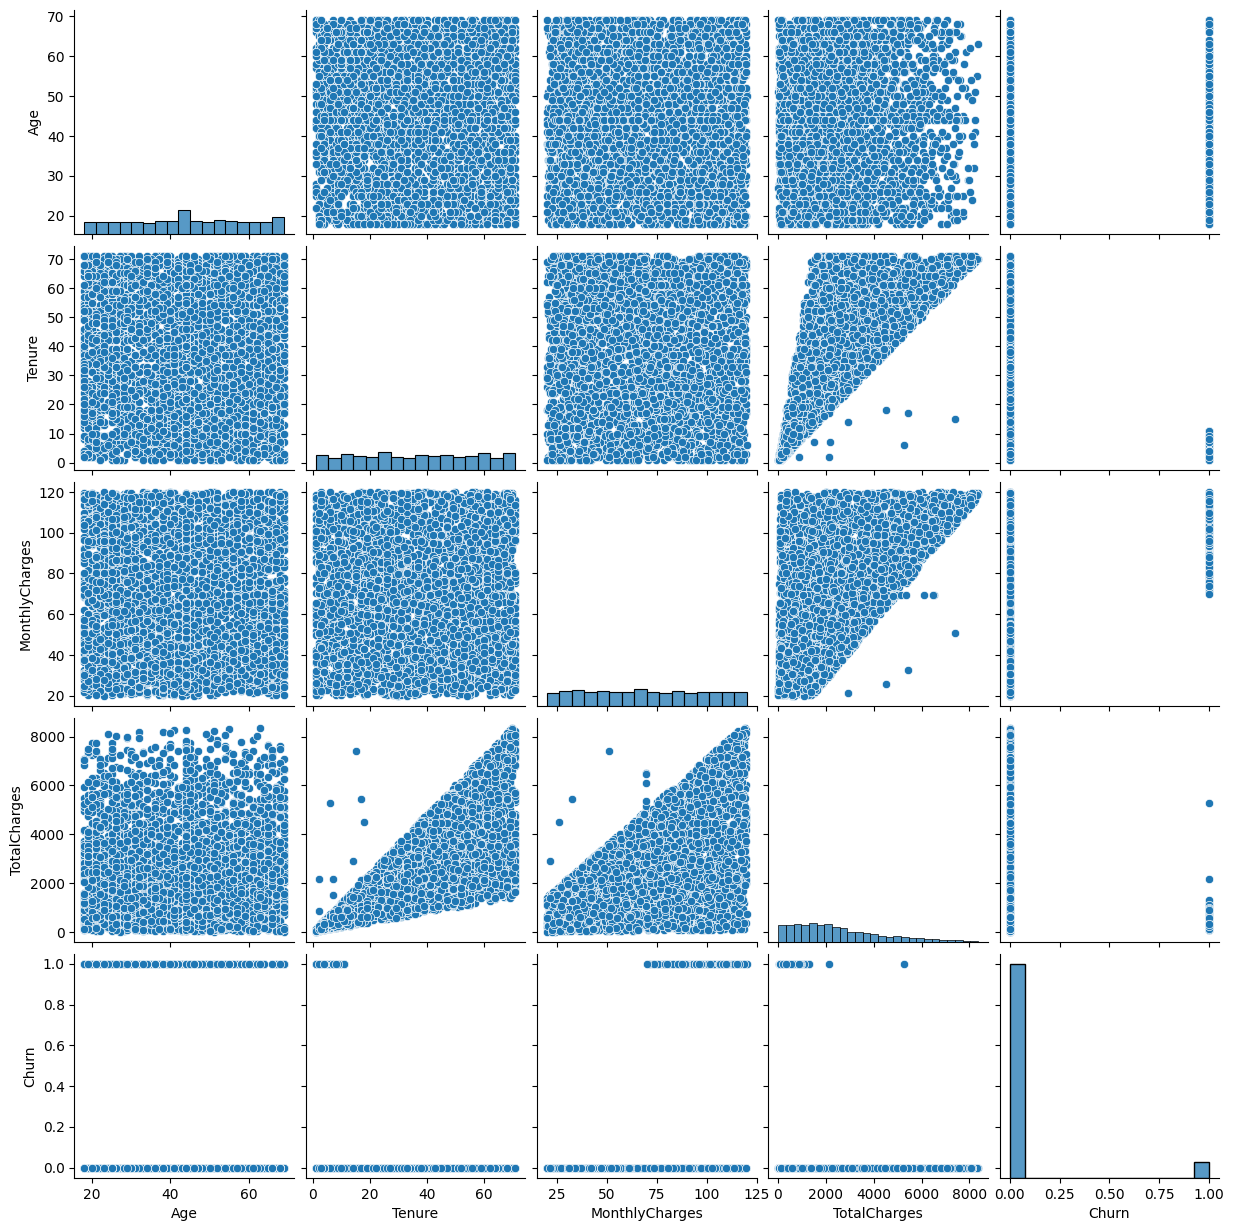

In [159]:
sns.pairplot(data[numerical_features + ['Churn']])
plt.show()

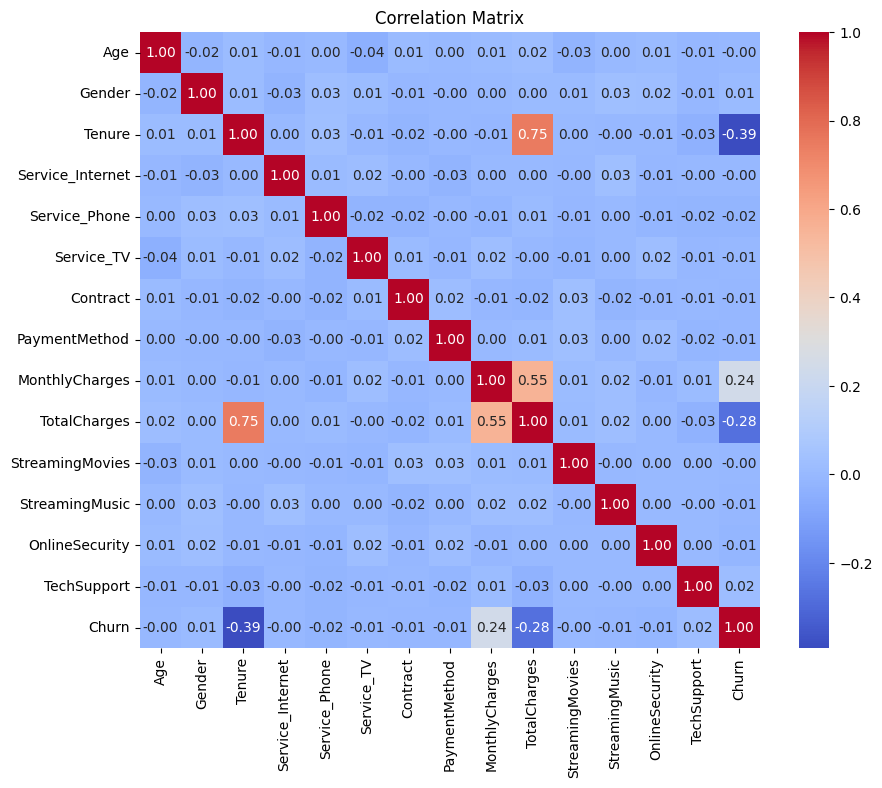

In [160]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering

In [161]:
# Function to engineer new features
def feature_engineering(data):

    data['MonthlyCharges_per_Tenure'] = data['MonthlyCharges'] / (data['Tenure'] + 1)
    
    data['TotalCharges_per_Tenure'] = data['TotalCharges'] / (data['Tenure'] + 1)

    # Total number of services
    data['TotalServices'] = (data['Service_Internet'] + data['Service_Phone'] + data['Service_TV'] +
                             data['StreamingMovies'] + data['StreamingMusic'] + data['OnlineSecurity'] + data['TechSupport'])

    # Flag for senior citizen status
    data['IsSeniorCitizen'] = (data['Age'] >= 65).astype(int)

    return data

# Apply feature engineering
data = feature_engineering(data)

# Display the first few rows with new features
data.head()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn,MonthlyCharges_per_Tenure,TotalCharges_per_Tenure,TotalServices,IsSeniorCitizen
0,56.0,1,13,0,1,0,1,3,71.88,931.49,0,0,1,0,0,5.134286,66.535000,2,0
1,69.0,1,13,0,0,1,2,3,110.99,1448.46,1,1,0,0,0,7.927857,103.461429,3,1
2,46.0,1,60,1,0,1,0,3,116.74,6997.73,1,1,0,0,0,1.913770,114.716885,4,0
3,32.0,0,57,1,1,1,0,0,78.16,4452.13,0,1,0,1,0,1.347586,76.760862,5,0
4,60.0,1,52,1,1,1,2,2,30.33,1569.73,1,0,1,1,0,0.572264,29.617547,6,0


## Scaling the numerical features

In [162]:
numerical_features += ['MonthlyCharges_per_Tenure', 'TotalCharges_per_Tenure']

scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [163]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X.head()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,MonthlyCharges_per_Tenure,TotalCharges_per_Tenure,TotalServices,IsSeniorCitizen
0,0.745098,1,0.171429,0,1,0,1,3,0.5188,0.110089,0,0,1,0,0.082066,0.080164,2,0
1,1.000000,1,0.171429,0,0,1,2,3,0.9099,0.172065,1,1,0,0,0.129368,0.129549,3,1
2,0.549020,1,0.842857,1,0,1,0,3,0.9674,0.837328,1,1,0,0,0.027534,0.144602,4,0
3,0.274510,0,0.800000,1,1,1,0,0,0.5816,0.532154,0,1,0,1,0.017947,0.093840,5,0
4,0.823529,1,0.728571,1,1,1,2,2,0.1033,0.186603,1,0,1,1,0.004818,0.030790,6,0


## Feature Selection

In [164]:
def select_features(X, y):
    model = RandomForestClassifier(random_state=42)
    rfe = RFE(model, n_features_to_select=10)
    X_final = rfe.fit_transform(X, y)
    final_features = X.columns[rfe.get_support()]
    print(final_features)
    return final_features

In [165]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
selected_features = select_features(X_train, y_train)
X_test = X_test[selected_features]
X_train = X_train[selected_features]

print(X_train, X_test)

Index(['Age', 'Tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'TechSupport', 'MonthlyCharges_per_Tenure',
       'TotalCharges_per_Tenure', 'TotalServices'],
      dtype='object')
           Age    Tenure  Contract  PaymentMethod  MonthlyCharges  \
2470  0.568627  0.300000         0              2          0.3533   
1897  0.549020  0.814286         1              3          0.4711   
887   0.568627  0.471429         0              2          0.5487   
2668  0.686275  0.985714         2              2          0.4776   
685   0.156863  0.085714         1              2          0.0501   
...        ...       ...       ...            ...             ...   
1130  0.568627  0.485714         0              2          0.2411   
1294  0.490196  0.971429         0              0          0.2909   
860   0.647059  0.357143         0              2          0.2025   
3507  0.372549  0.885714         2              3          0.4217   
3174  0.901961  0.971429     

In [167]:
print("Class Distribution in training set:\n", y_train.value_counts())
print("Class Distribution in testing set:\n", y_test.value_counts())

Class Distribution in training set:
 Churn
0    2438
1     186
Name: count, dtype: int64
Class Distribution in testing set:
 Churn
0    1060
1      65
Name: count, dtype: int64


In [168]:
X_train.to_csv('/Users/sahilnakrani/Documents/DATA_ANALYSIS/ML/MachineLearning/Data/X_train_data.csv')
y_train.to_csv('/Users/sahilnakrani/Documents/DATA_ANALYSIS/ML/MachineLearning/Data/y_train_data.csv')
X_test.to_csv('/Users/sahilnakrani/Documents/DATA_ANALYSIS/ML/MachineLearning/Data/X_test_data.csv')
y_test.to_csv('/Users/sahilnakrani/Documents/DATA_ANALYSIS/ML/MachineLearning/Data/y_test_data.csv')

## Model Evaluation and Training

In [169]:
def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Training the model with the best parameters
    best_model = grid_search.best_estimator_

    # Predictions
    predictions = best_model.predict(X_test)

    # Best parameters
    best_parameters = grid_search.best_params_
    print("Best Parameters:", best_parameters)
    
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    # Evaluation
    conf_matrix = confusion_matrix(y_test, predictions)

    # Visualization of Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return best_model

In [170]:
# Check overfitting
def check_overfitting(model, X_train, y_train, X_test, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")

In [171]:
def feature_importance(model, selected_features):
    # Feature importances from Best Random Forest
    importances = model.feature_importances_
    feature_names = X[selected_features].columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    print(feature_importance_df.sort_values(by='importance', ascending=False))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      0.98      0.99        65

    accuracy                           1.00      1125
   macro avg       1.00      0.99      1.00      1125
weighted avg       1.00      1.00      1.00      1125



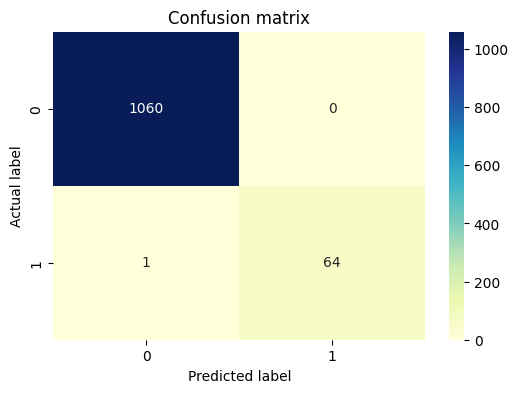

Training Accuracy: 1.0000
Testing Accuracy: 0.9991
                     feature  importance
7  MonthlyCharges_per_Tenure    0.368989
4             MonthlyCharges    0.224608
1                     Tenure    0.206410
5               TotalCharges    0.103491
8    TotalCharges_per_Tenure    0.091180
0                        Age    0.003077
9              TotalServices    0.001205
2                   Contract    0.000754
6                TechSupport    0.000183
3              PaymentMethod    0.000103


In [172]:
# Example usage for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}
rf = evaluate_model(RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train, X_test, y_test)
check_overfitting(rf, X_train, y_train, X_test, y_test)
feature_importance(rf, selected_features)



Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1060
           1       0.90      0.88      0.89        65

    accuracy                           0.99      1125
   macro avg       0.95      0.94      0.94      1125
weighted avg       0.99      0.99      0.99      1125



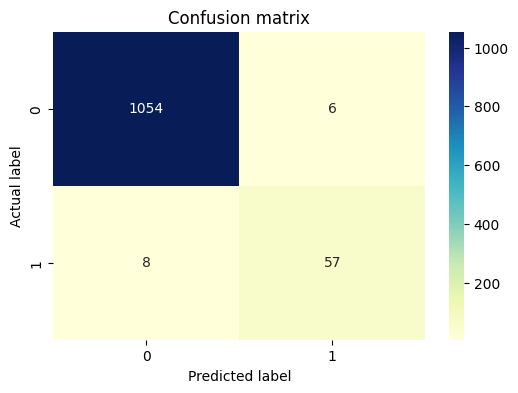

Training Accuracy: 0.9863
Testing Accuracy: 0.9876


In [173]:
# Example usage for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
lr = evaluate_model(LogisticRegression(random_state=42, max_iter=1000), lr_param_grid, X_train, y_train, X_test, y_test)
check_overfitting(lr, X_train, y_train, X_test, y_test)



Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      0.98      0.99        65

    accuracy                           1.00      1125
   macro avg       1.00      0.99      1.00      1125
weighted avg       1.00      1.00      1.00      1125



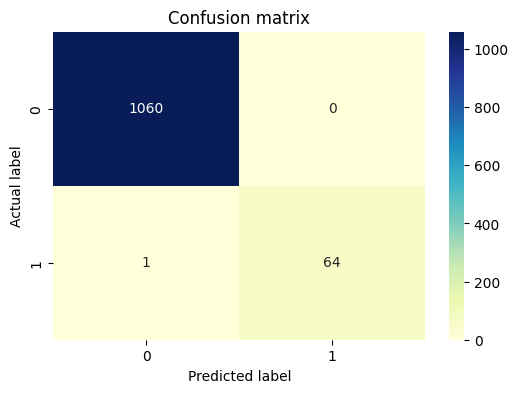

Training Accuracy: 1.0000
Testing Accuracy: 0.9991
                     feature  importance
7  MonthlyCharges_per_Tenure    0.590972
4             MonthlyCharges    0.311781
1                     Tenure    0.088365
5               TotalCharges    0.007237
8    TotalCharges_per_Tenure    0.001645
0                        Age    0.000000
2                   Contract    0.000000
3              PaymentMethod    0.000000
6                TechSupport    0.000000
9              TotalServices    0.000000


In [174]:
# Example usage for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}
gb = evaluate_model(GradientBoostingClassifier(random_state=42), gb_param_grid, X_train, y_train, X_test, y_test)
check_overfitting(gb, X_train, y_train, X_test, y_test)
feature_importance(gb, selected_features)




Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      0.98      0.99        65

    accuracy                           1.00      1125
   macro avg       1.00      0.99      1.00      1125
weighted avg       1.00      1.00      1.00      1125



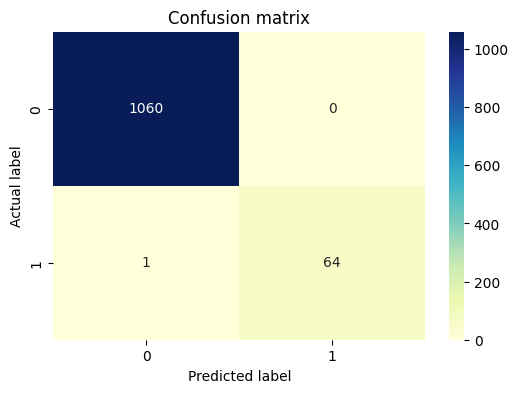

Training Accuracy: 1.0000
Testing Accuracy: 0.9991
                     feature  importance
7  MonthlyCharges_per_Tenure    0.583291
4             MonthlyCharges    0.289014
1                     Tenure    0.079981
5               TotalCharges    0.047713
0                        Age    0.000000
2                   Contract    0.000000
3              PaymentMethod    0.000000
6                TechSupport    0.000000
8    TotalCharges_per_Tenure    0.000000
9              TotalServices    0.000000


In [175]:
# Example usage for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}
dt = evaluate_model(DecisionTreeClassifier(random_state=42), dt_param_grid, X_train, y_train, X_test, y_test)
check_overfitting(dt, X_train, y_train, X_test, y_test)
feature_importance(dt, selected_features)
